#Lectura y procesamiento de los resultados de los mejores modelos ELM

En el presente archivo se leen los archivos excel que contienen resumenes de los modelos generados con las grillas de ELM. Se procesa dicha información para encontrar los mejores modelos.

In [1]:
# Access files from your Google Drive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
cd gdrive/MyDrive/Universidad/2020/Tesis_final/problema2/leer_procesar_modelos_NARX/results/

/content/gdrive/MyDrive/Universidad/2020/Tesis_final/problema2/leer_procesar_modelos_NARX/results


In [3]:
#imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from joblib import dump, load

summaryModelsSVR1S = pd.read_excel('grilla_SVR_NARX_1STEPS.xlsx', header=0)
summaryModelsSVR2S = pd.read_excel('grilla_SVR_NARX_2STEPS.xlsx', header=0)
summaryModelsSVR3S = pd.read_excel('grilla_SVR_NARX_3STEPS.xlsx', header=0)
summaryModelsSVR4S = pd.read_excel('grilla_SVR_NARX_4STEPS.xlsx', header=0)

grilla_SVR_NARX_AQP = pd.concat([summaryModelsSVR1S, summaryModelsSVR2S], ignore_index=True)
grilla_SVR_NARX_AQP = pd.concat([grilla_SVR_NARX_AQP, summaryModelsSVR3S], ignore_index=True)
grilla_SVR_NARX_AQP = pd.concat([grilla_SVR_NARX_AQP, summaryModelsSVR4S], ignore_index=True)

grilla_SVR_NARX_AQP.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 960 entries, 0 to 959
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   MAPE                    960 non-null    float64
 1   delayedSteps            960 non-null    int64  
 2   nameModel               960 non-null    object 
 3   nameConfiguration       960 non-null    object 
 4   timeTrain (in seconds)  960 non-null    int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 37.6+ KB


##La cantidad de modelos generados para el SVR NARX de DDFO fue de 960

In [4]:
rslt_df = grilla_SVR_NARX_AQP.sort_values('MAPE')
total = grilla_SVR_NARX_AQP['timeTrain (in seconds)'].sum()
print("Tiempo total: " + str(total))
grilla_SVR_NARX_AQP.describe()

Tiempo total: 0


MAPE  delayedSteps  timeTrain (in seconds)
count  960.000000    960.000000                   960.0
mean    18.059266      2.500000                     0.0
std      1.172853      1.118617                     0.0
min     14.813648      1.000000                     0.0
25%     17.881104      1.750000                     0.0
50%     18.249582      2.500000                     0.0
75%     18.981966      3.250000                     0.0
max     19.362194      4.000000                     0.0

##La cantidad de segundos totales para ejecutar la grilla es aproximadamente 1, lo que equivale a 0 horas aproximadamente. Además se tienen las estadisticas resumen.

In [5]:
rslt_df.iloc[:45,:]

MAPE  ...  timeTrain (in seconds)
923  14.813648  ...                       0
953  14.813648  ...                       0
918  14.815574  ...                       0
948  14.815574  ...                       0
952  14.817101  ...                       0
922  14.817101  ...                       0
921  14.819387  ...                       0
951  14.819387  ...                       0
920  14.820518  ...                       0
950  14.820518  ...                       0
919  14.820757  ...                       0
949  14.820757  ...                       0
912  14.996581  ...                       0
942  14.996581  ...                       0
913  14.999713  ...                       0
943  14.999713  ...                       0
944  15.002856  ...                       0
914  15.002856  ...                       0
915  15.005960  ...                       0
945  15.005960  ...                       0
946  15.012247  ...                       0
916  15.012247  ...                       0
917  15.015750  ...                       0
947  15.015750  ...                       0
954  15.229738  ...                       0
924  15.229738  ...                       0
925  15.233943  ...                       0
955  15.233943  ...                       0
956  15.238107  ...                       0
926  15.238107  ...                       0
957  15.242317  ...                       0
927  15.242317  ...                       0
928  15.250698  ...                       0
958  15.250698  ...                       0
959  15.263236  ...                       0
929  15.263236  ...                       0
474  15.362919  ...                       0
444  15.362919  ...                       0
475  15.365464  ...                       0
445  15.365464  ...                       0
476  15.372080  ...                       0
446  15.372080  ...                       0
477  15.378691  ...                       0
447  15.378691  ...                       0
478  15.391896  ...                       0

[45 rows x 5 columns]

In [6]:
rslt_df.iloc[36,:]

MAPE                                                               15.3629
delayedSteps                                                             2
nameModel                     results/SVR_26_1_linear_auto_1_0.1_2S.joblib
nameConfiguration         results/SVR_26_1_linear_auto_1_0.1_2S_config.npy
timeTrain (in seconds)                                                   0
Name: 474, dtype: object

##Por principio de parsimonia, se decide trabajar con un modelo que genera un MAPE de 15.3, pero que tiene pocos retardos, especificamente 2 retardo.

In [7]:
bestModel = rslt_df.iloc[36,:]
print(bestModel)

MAPE                                                               15.3629
delayedSteps                                                             2
nameModel                     results/SVR_26_1_linear_auto_1_0.1_2S.joblib
nameConfiguration         results/SVR_26_1_linear_auto_1_0.1_2S_config.npy
timeTrain (in seconds)                                                   0
Name: 474, dtype: object


In [8]:
print(bestModel['nameConfiguration'])
print(bestModel['nameModel'])

results/SVR_26_1_linear_auto_1_0.1_2S_config.npy
results/SVR_26_1_linear_auto_1_0.1_2S.joblib


In [9]:
print(bestModel['nameConfiguration'].split("/")[1])
print(bestModel['nameModel'].split("/")[1])

SVR_26_1_linear_auto_1_0.1_2S_config.npy
SVR_26_1_linear_auto_1_0.1_2S.joblib


In [10]:
#para recuperar configDict
config=np.load(bestModel['nameConfiguration'].split("/")[1],allow_pickle='TRUE').item()
print(config)

#Para cargar modelo:
saved_model = load(bestModel['nameModel'].split("/")[1]) 

{'nInputs': 26, 'nOutputs': 1, 'Kernel': 'linear', 'Gamma': 'auto', 'C': 1, 'Epsilon': 0.1, 'Delays': 2, 'PredictionHorizon': 1}


In [12]:
def cargarData1():
  trainDFScaled = pd.read_csv('data/trainDF_std.csv', header=0)
  testDFScaled = pd.read_csv('data/testDF_std.csv', header=0)
  trainDF = pd.read_csv('data/trainDF.csv', header=0)
  testDF = pd.read_csv('data/testDF.csv', header=0)
  return trainDFScaled, testDFScaled, trainDF, testDF


# calculate the error between an actual and predicted value
def mae(actual, predicted):
	# calculate abs difference
	return abs(actual - predicted)
 
def mape(actual,pred):
  return np.mean(np.abs((actual - pred) / actual)) * 100

def evaluate_forecasts(predictions, testData):
  total_mae = 0.0
  total_mape = 0.0
  total_c = 0
  for i in range(len(predictions)):
    real = testData[i]
    predicted = predictions[i]
    # calculate error
    error_mae = mae(real, predicted)
    error_mape = mape(real, predicted)
    # update statistics
    total_mae += error_mae
    total_mape += error_mape
    total_c += 1
  # normalize summed absolute errors
  total_mae /= total_c
  total_mape /= total_c
  return total_mae, total_mape


def generateSupervisedData(data, delays, predictionHorizon, columnTarget = 12):
  X = list()
  y = list()
  cantidadFilas = data.shape[0]
  indexAux = 0
  indexTarget = 0
  for _, row in data.iterrows():
    end_row = indexAux + delays
    indexTarget = end_row - 1 + predictionHorizon
    if indexTarget <= cantidadFilas-1:
      salidaAux = data.iloc[indexTarget, columnTarget]
      xAux = data.iloc[indexAux:end_row, :].values
      #print(xAux.shape)
      #print(xAux)
      X.append(xAux)
      y.append(salidaAux)
      #print(salidaAux)
    indexAux = indexAux + 1
  X = np.array(X)
  y = np.array(y)
  return X, y

def generateFinalData(delays, predictionHorizon, trainDFScaled, testDFScaled, trainDF, testDF):
  trainXScaled, trainYScaled = generateSupervisedData(trainDFScaled, delays, predictionHorizon)
  testXScaled, testYScaled = generateSupervisedData(testDFScaled, delays, predictionHorizon)
  trainX, trainY = generateSupervisedData(trainDF, delays, predictionHorizon)
  testX, testY = generateSupervisedData(testDF, delays, predictionHorizon)
  #print("trainXScaled.shape: ", str(trainXScaled.shape))
  #print("trainYScaled.shape: ", str(trainYScaled.shape))
  #print("testXScaled.shape: ", str(testXScaled.shape))
  #print("testYScaled.shape: ", str(testYScaled.shape))
  #print("trainX.shape: ", str(trainX.shape))
  #print("trainY.shape: ", str(trainY.shape))
  #print("testX.shape: ", str(testX.shape))
  #print("testY.shape: ", str(testY.shape))
  return trainXScaled, trainY, testXScaled, testY



def reshapeXdata(trainXScaled, testXScaled):
  #reshape data
  trainXScaled = trainXScaled.reshape((trainXScaled.shape[0],trainXScaled.shape[1]*trainXScaled.shape[2]))
  #print("trainXScaled.shape: ", str(trainXScaled.shape))
  testXScaled = testXScaled.reshape((testXScaled.shape[0],testXScaled.shape[1]*testXScaled.shape[2]))
  #print("testXScaled.shape: ", str(testXScaled.shape))
  return trainXScaled, testXScaled


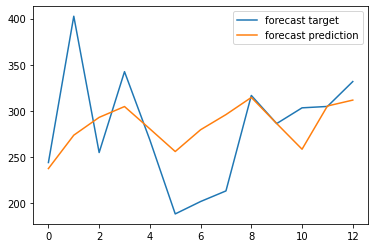

In [13]:
trainDFScaled, testDFScaled, trainDF, testDF = cargarData1()
trainXScaled, trainY, testXScaled, testY = generateFinalData(bestModel['delayedSteps'], 1, trainDFScaled, testDFScaled, trainDF, testDF)
trainXScaled, testXScaled = reshapeXdata(trainXScaled, testXScaled)
validation_target = testY[:]
validation_predictions = saved_model.predict(testXScaled[:,:])
fig, ax = plt.subplots(1, 1)
ax.plot(validation_target, label='forecast target')
ax.plot(validation_predictions, label='forecast prediction')
ax.legend()


##Generar data para NARMAX

In [14]:
def generateNarmaxData(dataScaled, data, delays, predictionHorizon, saved_model, columnTarget = 12):
  #Se hace una copia de los datos de entrada y agrega una columna con NA para los errores
  dataNarmax = data.copy()
  dataNarmax["error"] = np.nan
  dataNarmaxScaled = dataScaled.copy()
  dataNarmaxScaled["error"] = np.nan

  cantidadFilas = data.shape[0]
  indexAux = 0
  indexTarget = 0
  for _, row in data.iterrows():
    end_row = indexAux + delays
    indexTarget = end_row - 1 + predictionHorizon
    if indexTarget <= cantidadFilas-1:
      salidaAux = data.iloc[indexTarget, columnTarget]
      xAux = data.iloc[indexAux:end_row, :].values
      xAux = xAux.reshape(1, xAux.shape[0]*xAux.shape[1])
      prediction = saved_model.predict(xAux)
      error = mape(salidaAux, prediction)
      dataNarmax.iloc[indexTarget, columnTarget+1] = error
      dataNarmaxScaled.iloc[indexTarget, columnTarget+1] = error
    indexAux = indexAux + 1
  dataNarmax = dataNarmax.dropna()
  dataNarmaxScaled = dataNarmaxScaled.dropna()
  return dataNarmax, dataNarmaxScaled

In [15]:
dataTrainNarmax, dataTrainNarmaxScaled = generateNarmaxData(trainDFScaled, trainDF, bestModel['delayedSteps'], 1, saved_model)
dataTestNarmax, dataTestNarmaxScaled = generateNarmaxData(testDFScaled, testDF, bestModel['delayedSteps'], 1, saved_model)

In [16]:
from sklearn.preprocessing import StandardScaler

# create a scaler object
std_scaler = StandardScaler()

dataTrainNarmaxScaled[['error']] = std_scaler.fit_transform(dataTrainNarmaxScaled[['error']])
dataTestNarmaxScaled[['error']] = std_scaler.fit_transform(dataTestNarmaxScaled[['error']])

In [17]:
dataTrainNarmax.to_csv('dataTrainNarmaxSVR.csv', index = False)
dataTrainNarmaxScaled.to_csv('dataTrainNarmaxScaledSVR.csv', index = False)
dataTestNarmax.to_csv('dataTestNarmaxSVR.csv', index = False)
dataTestNarmaxScaled.to_csv('dataTestNarmaxScaledSVR.csv', index = False)

In [18]:
dataTrainNarmax.iloc[:10,[0,1,12,13]]

Week_of_the_month  Day_of_the_week  Target_(Total_orders)          error
2                 1.0              6.0                129.412  121764.360370
3                 2.0              2.0                317.120   26682.906557
4                 2.0              3.0                210.517   68877.369637
5                 2.0              4.0                207.364   30775.351687
6                 2.0              5.0                263.043   71223.044960
7                 2.0              6.0                248.958  101803.479049
8                 3.0              2.0                344.291   73720.675325
9                 3.0              3.0                248.428   35897.849447
10                3.0              4.0                281.420   19434.218072
11                3.0              5.0                243.568   32180.362289

In [19]:
dataTestNarmaxScaled.iloc[:10,[0,1,12,13]]

Week_of_the_month  Day_of_the_week  Target_(Total_orders)     error
2           -0.013109        -0.023980              -0.637444 -0.657855
3           -0.013109         0.695422               1.144976 -0.598261
4           -0.013109         1.414823              -0.515601 -1.539373
5            0.773442        -1.462783               0.469686 -0.225057
6            0.773442        -0.743382              -0.362774  0.190779
7            0.773442        -0.023980              -1.263585  0.983645
8            0.773442         0.695422              -1.112536 -1.152958
9            0.773442         1.414823              -0.983254  0.022156
10           1.559993        -1.462783               0.179801  0.287983
11           1.559993        -0.743382              -0.162757  0.061668